In [1]:
from AoE2ScenarioParser.datasets.players import PlayerId
from AoE2ScenarioParser.datasets.units import UnitInfo
from AoE2ScenarioParser.datasets.buildings import BuildingInfo
from AoE2ScenarioParser.datasets.other import OtherInfo
from AoE2ScenarioParser.datasets.terrains import TerrainId
from aoe2mapgenerator.common.enums.enum import (
    MapLayerType, 
    ObjectSize, 
    GateType, 
    TemplateTypes, 
    ObjectRotation, 
    YamlReplacementKeywords,
    CheckPlacementReturnTypes
)

from aoe2mapgenerator.scenario.scenario import Scenario
import numpy as np
import random
from aoe2mapgenerator.common.constants.constants import DEFAULT_EMPTY_VALUE, BASE_SCENE_DIR_LINUX, BASE_SCENARIO_NAME, TEMPLATE_DIR_LINUX
from aoe2mapgenerator.common.constants.default_objects import GHOST_OBJECT_DISPLACEMENT, DEFAULT_EMPTY_OBJECT
from aoe2mapgenerator.common.enums.enum import GateType
import multiprocessing as mp
from aoe2mapgenerator.map.map import Map
import os
from aoe2mapgenerator.serializer.serializer import (
    _convert_map_value_to_string,_get_enum_list, 
    _recursive_parse_enum_to_string, serialize_map, 
    get_all_functions_and_arguments, 
    _get_functions,
    _get_function_arguments,
    _get_default_arguments,
    _convert_enum_instance_to_string)
from aoe2mapgenerator.triggers.triggers import TriggerObject
from aoe2mapgenerator.maingenerator import main_map_generator
import inspect
import ast
import json
from enum import Enum
from aoe2mapgenerator.units.wallgenerators.voronoi import VoronoiGenerator
from AoE2ScenarioParser.scenarios.aoe2_de_scenario import AoE2DEScenario
from aoe2mapgenerator.units.placers.statictemplate import TemplateCreator
from aoe2mapgenerator.units.placers.group_placer import GroupPlacerManager
from aoe2mapgenerator.units.placers.point_manager import PointManager
from aoe2mapgenerator.testing import awesome_function
from aoe2mapgenerator.map.map_object import MapObject
from aoe2mapgenerator.units.placers.point_selector import PointSelector
from aoe2mapgenerator.visualizer.visualizer import Visualizer
from aoe2mapgenerator.units.placers.gate_placer import GatePlacer
from aoe2mapgenerator.units.placers.wall_placer import WallPlacer
from aoe2mapgenerator.map.map_manager import MapManager
from aoe2mapgenerator.units.placers.placer_configs import *
from aoe2mapgenerator.units.placers.placer_configs import PlaceGroupsConfig
import dataclasses
import json
from aoe2mapgenerator.templates.python_templates.decor import place_autumn_decor

In [7]:
n = 256
map_manager = MapManager(n)
# This setup is kinda ugly for the point
# point_selector = PointSelector(map_manager.get_map())

In [8]:
point_manager = PointManager()
point_manager.add_points([(i,j) for i in range(n) for j in range(n)])

In [9]:
place_autumn_decor(map_manager, point_manager=point_manager, map_layer_type=MapLayerType.DECOR)

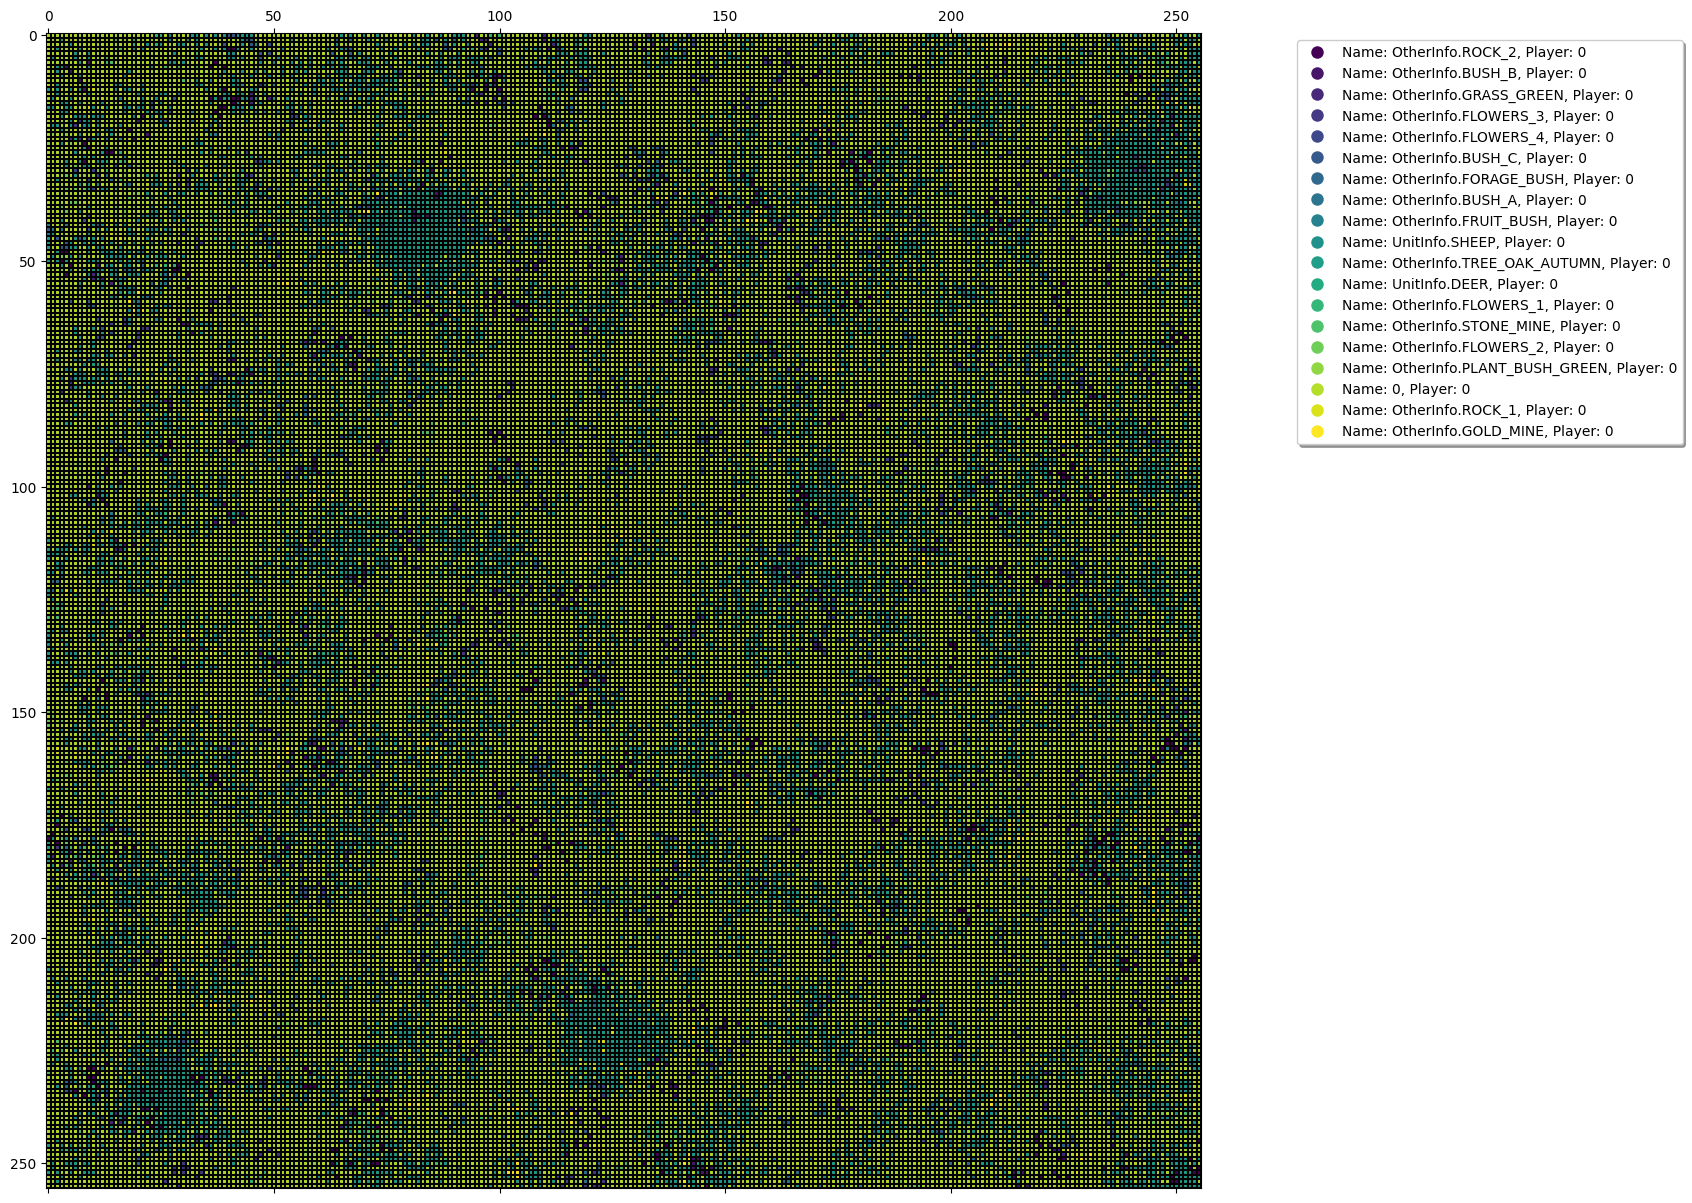

In [10]:
map_manager.visualize_map(VisualizeMapConfig(
    map_layer_type=MapLayerType.DECOR,fig_size=(15,15)
))

In [11]:
scen = Scenario(aoe2_map=map_manager.get_map())
scen._change_map_size(256)
scen.write_map()
scen.save_file(os.path.join(BASE_SCENE_DIR_LINUX, "decor_test.aoe2scenario"))


[22:06:40] Reading file: '/home/joseph/.steam/steam/steamapps/compatdata/813780/pfx/dosdevices/c:/users/steamuser/Games/Age of Empires 2 DE/76561198242754748/resources/_common/scenario/BASE_SCENARIO.aoe2scenario'
[22:06:40] Reading scenario file finished successfully.

############### Attributes ###############
>>> Game version: 'DE'
>>> Scenario version: 1.53
>>> Scenario variant: 'Age of Empires 2'
##########################################

[22:06:40] Loading scenario structure finished successfully.
[22:06:40] Parsing scenario file...
	✔ FileHeadereHeader data...
	✔ DataHeaderaHeader data...
	✔ Messagesessages data...
	✔ Cinematicsematics data...
	✔ BackgroundImagendImage data...
	✔ PlayerDataTwoDataTwo data...
	✔ GlobalVictoryVictory data...
	✔ Diplomacyplomacy data...
	✔ OptionsOptions data...
	✔ Maping Map data...
	✔ Unitsg Units data...
	✔ Triggersriggers data...
	✔ Filesg Files data...
[22:06:42] Parsing scenario file finished successfully.

[22:06:42] Setting up managers ...